# Introduction to Survival Analysis: the Kaplan-Meier estimator

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter 
from lifelines.statistics import (logrank_test, 
                                  pairwise_logrank_test, 
                                  multivariate_logrank_test, 
                                  survival_difference_at_fixed_point_in_time_test)

plt.style.use('seaborn')

In [2]:
%config InlineBackend.figure_format = 'retina'

## Loading and preparing the data

In [3]:
df = pd.read_csv('../data/telco_customer_churn.csv')
df['churn'] = [1 if x == 'Yes' else 0 for x in df['Churn']]

print(f"Shape of the DataFrame: {df.shape}")
print(f"Number of unique users in the DataFrame: {df['customerID'].nunique()}")
df.head()

Shape of the DataFrame: (7043, 22)
Number of unique users in the DataFrame: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## Kaplan-Meier Estimate

### General survival curve

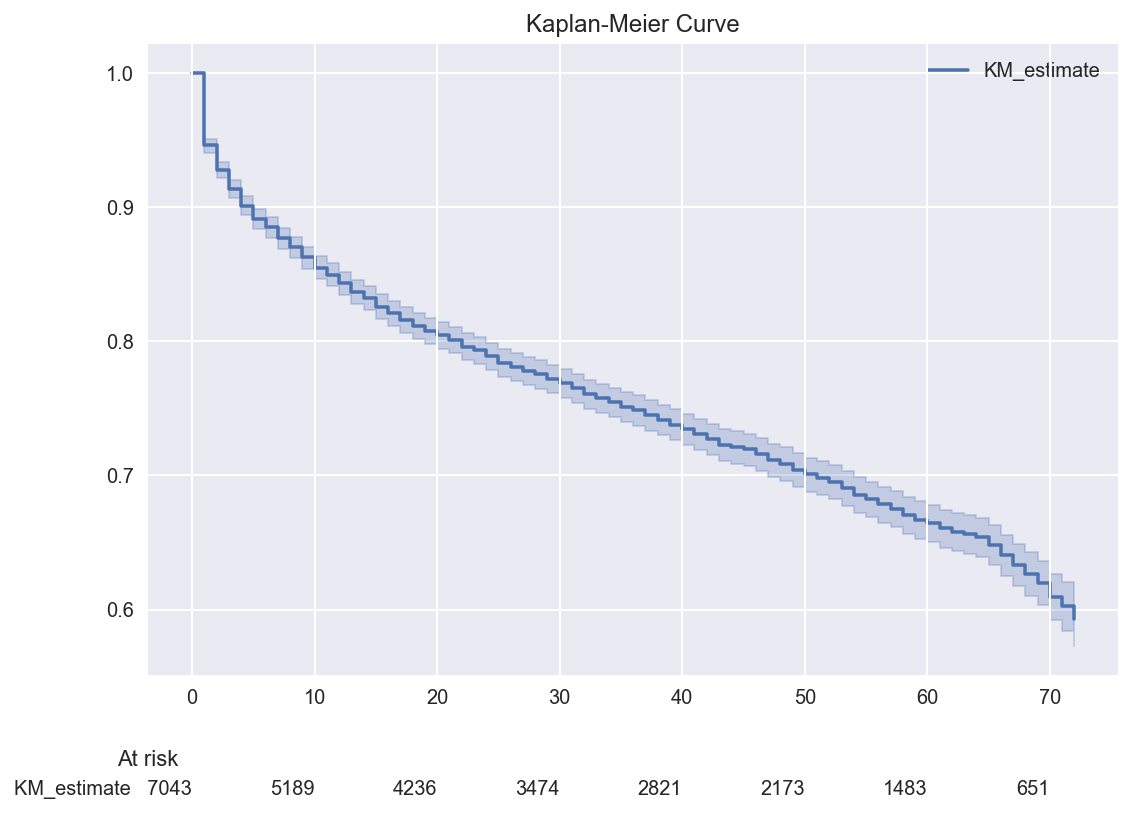

In [4]:
T = df['tenure']
E = df['churn']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

kmf.plot(at_risk_counts=True)
plt.title('Kaplan-Meier Curve');

In [5]:
kmf.median_survival_time_

inf

### Survival curves for each payment method

In [6]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

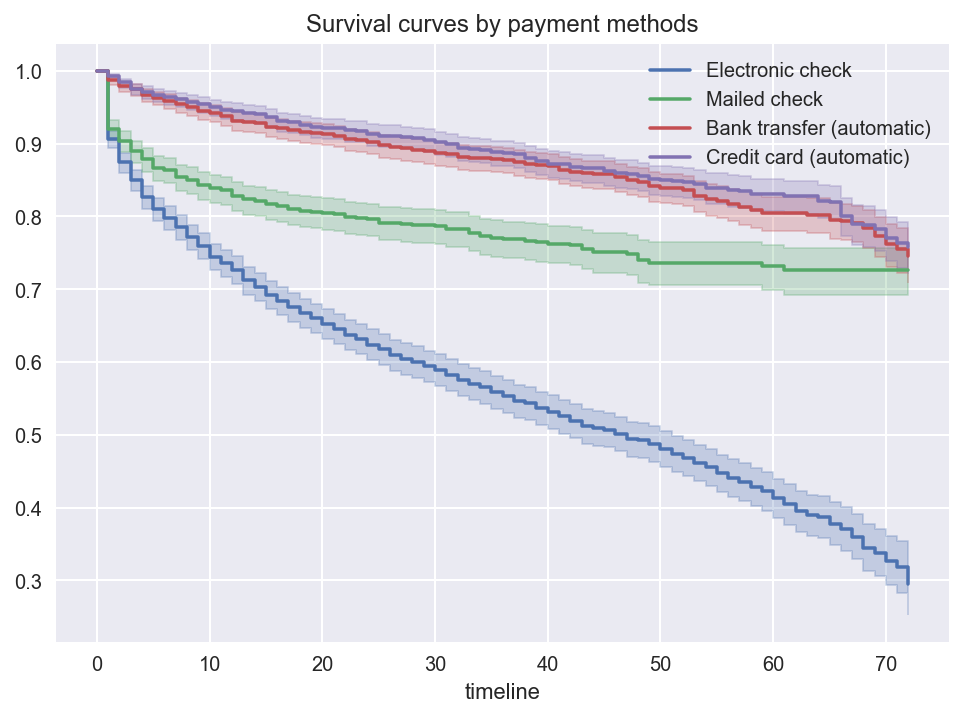

In [7]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for payment_method in df['PaymentMethod'].unique():
    
    flag = df['PaymentMethod'] == payment_method
    
    kmf.fit(T[flag], event_observed=E[flag], label=payment_method)
    kmf.plot(ax=ax)

plt.title("Survival curves by payment methods");

### The log-rank test

In [9]:
credit_card_flag = df['PaymentMethod'] == 'Credit card (automatic)'
bank_transfer_flag = df['PaymentMethod'] == 'Bank transfer (automatic)'

results = logrank_test(T[credit_card_flag], 
                       T[bank_transfer_flag], 
                       E[credit_card_flag], 
                       E[bank_transfer_flag])
results.print_summary()

In [7]:
results = pairwise_logrank_test(df['tenure'], df['PaymentMethod'], df['churn'])
results.print_summary()

In [10]:
results = multivariate_logrank_test(df['tenure'], df['PaymentMethod'], df['churn'])
results.print_summary()

### Testing survival difference at fixed point in time 

In [10]:
results = survival_difference_at_fixed_point_in_time_test(40, 
                                                          T[credit_card_flag], 
                                                          T[bank_transfer_flag], 
                                                          E[credit_card_flag], 
                                                          E[bank_transfer_flag])
results.print_summary()

In [11]:
results = survival_difference_at_fixed_point_in_time_test(60, 
                                                          T[credit_card_flag], 
                                                          T[bank_transfer_flag], 
                                                          E[credit_card_flag], 
                                                          E[bank_transfer_flag])
results.print_summary()